In [1]:
# conda: gridTools

# cd to the 'lib' directory in your notebooks directory
# $ export LIBROOT=`pwd`
# Start jupyter lab from any directory
import sys, os
if (os.environ.get('LIBROOT')):
    sys.path.append(os.environ.get('LIBROOT'))

    from sysInfo import sysInfo
info = sysInfo()
info.show(vList=['platform','python','esmf','esmpy','xgcm','xesmf',
                 'netcdf4','numpy','xarray',
                 'cartopy','matplotlib',
                 'jupyter_core','jupyterlab','notebook',
                 'dask'])
    
from gridUtils import gridUtils
#%matplotlib inline

System name                             : Linux
System name                             : mom6vm
Operating system release                : 5.8.0-44-generic
Operating system version                : #50~20.04.1-Ubuntu SMP Wed Feb 10 21:07:30 UTC 2021
Hardware identifier                     : x86_64
Active conda environment                : gridTools
Conda reported versions of software:
platform                                : linux-64
python                                  : 3.8.6
esmf                                    : not installed
esmpy                                   : not installed
xgcm                                    : not installed
xesmf                                   : not installed
netcdf4                                 : 1.5.6
numpy                                   : 1.20.1
xarray                                  : 0.17.0
cartopy                                 : 0.17.0
matplotlib                              : 3.3.4
jupyter_core                            : 4.7.

In [2]:
grd = gridUtils()

Generating regular lat-lon grid between ceneterd at  230.0 0.0
   generated regular lat-lon grid between latitudes  -15.0 15.0
   number of js= 61


/home/cermak/miniconda3/envs/gridTools/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


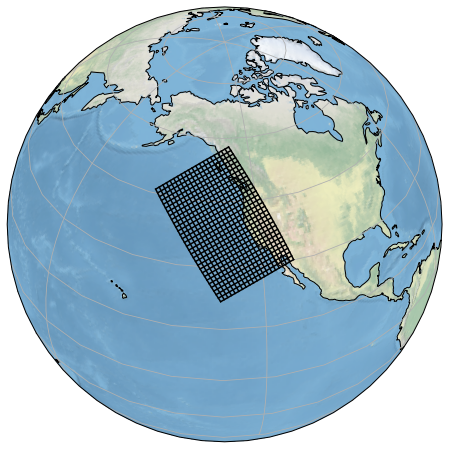

In [3]:
# Specify the grid properties
# All
# Specify the desired resolution
refineR   = 1   # Inverse of nominal resolution
refineS   = 2   # Set to 2 for supergrid
lon_span  = 20.
lat_span  = 30.

# 230E = 
lon0      = 230.0 
lat0      = 40.0
tilt      = 30.0

# debugging
#lon_span = 40.0
#lat_span = 10.0
# Lines the grid up on the dateline
#lon0      = 180.0
#tilt      =   0.0

lamc, phic = grd.generate_regional_spherical(lon0, lon_span, lat0, lat_span, tilt, refineR*refineS)  

grd.mesh_plot(lamc, phic, lon0, lat0)

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.draw()

<Figure size 432x288 with 0 Axes>

In [6]:
plt

<module 'matplotlib.pyplot' from '/home/cermak/miniconda3/envs/gridTools/lib/python3.8/site-packages/matplotlib/pyplot.py'>